In [41]:
# Referencia del modelo de regresión logística con sklearn:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [42]:
# Declaración de librerías

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
# Creamos un conjunto de datos con la entrada y salida de cada experimento:

# Los valores de entrada (x) deben de estar reescalados con -1 y 1
# porque solo tenemos una caracteristica a analizar, ya que es una
# regresión lineal simple
x = np.array([0, 5, 15, 30, 50, 60, 85, 92, 98, 99]).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 0, 1, 1,1,1 ])

print("Input:", x)
print("Output:", y)

Input: [[ 0]
 [ 5]
 [15]
 [30]
 [50]
 [60]
 [85]
 [92]
 [98]
 [99]]
Output: [0 0 0 0 1 0 1 1 1 1]


In [44]:
# Creamos un modelo de regresión logística
# Random state es para poder replicar el resultado para todos
# El solver 'liblinear' es uno de varios para el cálculo de la regresión
model = LogisticRegression(random_state=0)

# Entrenamos el modelo
model.fit(x, y)

LogisticRegression(random_state=0)

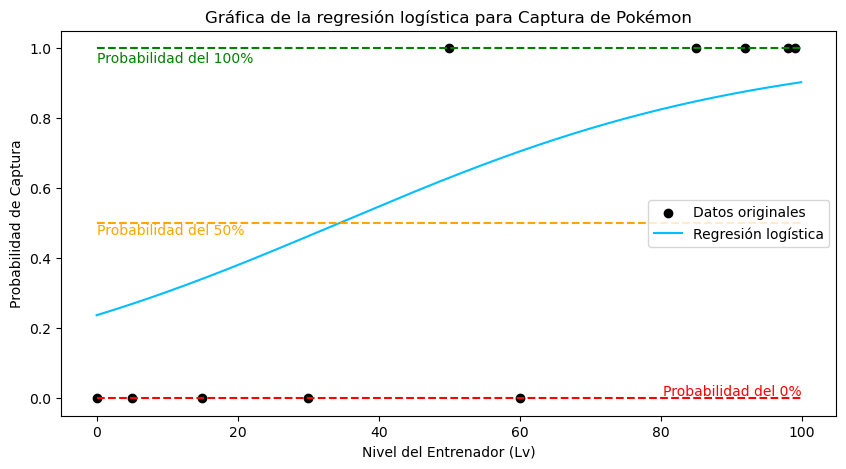

In [49]:


# Crear el modelo de regresión logística
model = LogisticRegression(random_state=0, solver='liblinear')
model.fit(x, y)

# Crear rango de niveles para la gráfica
niveles = np.arange(0, 100, 0.1).reshape(-1, 1)
probabilidades_captura = model.predict_proba(niveles)[:, 1]

# Graficar la regresión logística para la probabilidad de captura de Pokémon
plt.figure(figsize=(10, 5))
plt.scatter(x, y, color='black', label='Datos originales')
plt.plot(niveles, probabilidades_captura, color='deepskyblue', label='Regresión logística')

# Líneas de probabilidad
plt.plot(niveles, np.ones(len(niveles)), color='green', linestyle='dashed')
plt.text(0, .95, 'Probabilidad del 100%', ha='left', va='bottom', color='green')

plt.plot(niveles, np.zeros(len(niveles)), color='red', linestyle='dashed')
plt.text(100, 0, 'Probabilidad del 0%', ha='right', va='bottom', color='red')

plt.plot(niveles, np.ones(len(niveles)) * 0.5, color='orange', linestyle='dashed')
plt.text(0, 0.5, 'Probabilidad del 50%', ha='left', va='top', color='orange')

# Títulos de la gráfica
plt.xlabel('Nivel del Entrenador (Lv)')
plt.ylabel('Probabilidad de Captura')
plt.title('Gráfica de la regresión logística para Captura de Pokémon')
plt.legend(loc='center right')
plt.show()

In [46]:
# Calcular el nivel necesario para una probabilidad del 50%
nivel_50_probabilidad = int((0.5 - model.intercept_[0]) / model.coef_[0][0])

# Probabilidades de captura para los niveles específicos
niveles_especificos = np.array([10, 30, 70, 90]).reshape(-1, 1)
probabilidades_niveles = model.predict_proba(niveles_especificos)[:, 1]

# Imprimir resultados
print(f"Nivel necesario para una probabilidad de captura del 50%: Lv {nivel_50_probabilidad}")
print("Probabilidades de captura para niveles específicos:")
for nivel, probabilidad in zip([10, 30, 70, 90], probabilidades_niveles):
    print(f"  - Lv {nivel}: {probabilidad:.2%} de probabilidad de captura")

Nivel necesario para una probabilidad de captura del 50%: Lv 49
Probabilidades de captura para niveles específicos:
  - Lv 10: 30.40% de probabilidad de captura
  - Lv 30: 46.31% de probabilidad de captura
  - Lv 70: 77.07% de probabilidad de captura
  - Lv 90: 86.91% de probabilidad de captura


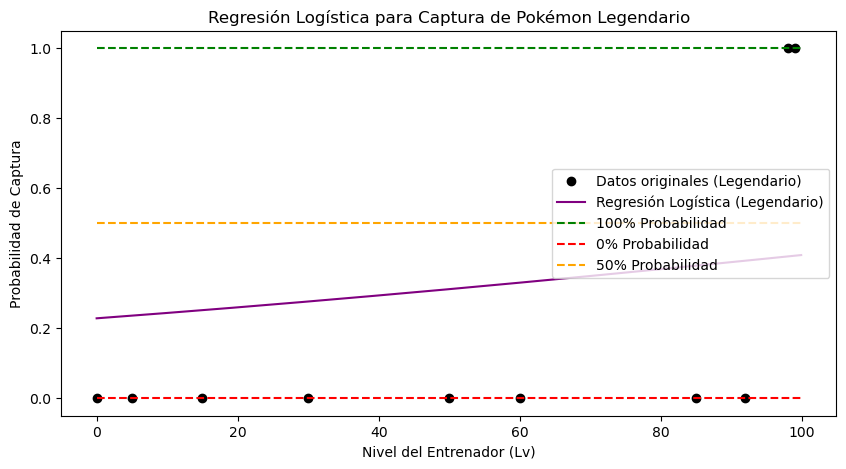

Coeficientes del modelo de Pokémon legendario:
  b0 (intercepto): -1.217848175775001
  b1 (pendiente): 0.008507378327450571

Nivel necesario para una probabilidad de captura del 50%: Lv 201
Nivel necesario para una probabilidad de captura del 90%: Lv 248


In [47]:
# Task 3: Modelo para un Pokémon legendario (solo atrapado en niveles 98 y 99)

# Nuevo conjunto de datos
x_legendary = np.array([0, 5, 15, 30, 50, 60, 85, 92, 98, 99]).reshape(-1, 1)
y_legendary = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

# Crear y entrenar el modelo de regresión logística para el Pokémon legendario
model_legendary = LogisticRegression(random_state=0, solver='liblinear')
model_legendary.fit(x_legendary, y_legendary)

# Coeficientes del modelo para el Pokémon legendario
b0_legendary = model_legendary.intercept_[0]
b1_legendary = model_legendary.coef_[0][0]

# Crear rango de niveles para la gráfica
niveles = np.arange(0, 100, 0.1).reshape(-1, 1)
probabilidades_legendary = model_legendary.predict_proba(niveles)[:, 1]

# Graficar el modelo de regresión logística para el Pokémon legendario
plt.figure(figsize=(10, 5))
plt.scatter(x_legendary, y_legendary, color='black', label='Datos originales (Legendario)')
plt.plot(niveles, probabilidades_legendary, color='purple', label='Regresión Logística (Legendario)')

# Líneas de probabilidad
plt.plot(niveles, np.ones(len(niveles)), color='green', linestyle='dashed', label='100% Probabilidad')
plt.plot(niveles, np.zeros(len(niveles)), color='red', linestyle='dashed', label='0% Probabilidad')
plt.plot(niveles, np.ones(len(niveles)) * 0.5, color='orange', linestyle='dashed', label='50% Probabilidad')
plt.xlabel('Nivel del Entrenador (Lv)')
plt.ylabel('Probabilidad de Captura')
plt.title('Regresión Logística para Captura de Pokémon Legendario')
plt.legend(loc='center right')
plt.show()

# Nivel necesario para obtener una probabilidad de captura del 50% y del 90%
nivel_50_probabilidad_legendary = int((0.5 - b0_legendary) / b1_legendary)
nivel_90_probabilidad_legendary = int((0.9 - b0_legendary) / b1_legendary)

# Imprimir resultados
print("Coeficientes del modelo de Pokémon legendario:")
print(f"  b0 (intercepto): {b0_legendary}")
print(f"  b1 (pendiente): {b1_legendary}")

print(f"\nNivel necesario para una probabilidad de captura del 50%: Lv {nivel_50_probabilidad_legendary}")
print(f"Nivel necesario para una probabilidad de captura del 90%: Lv {nivel_90_probabilidad_legendary}")
